In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
fb = pd.read_csv('../data/Facebook.csv')
amzn = pd.read_csv('../data/Amazon.csv')
aapl = pd.read_csv('../data/Apple.csv')
nflx = pd.read_csv('../data/Netflix.csv')
googl = pd.read_csv('../data/Google.csv')

# Add a column to identify the company
fb['Company'] = 'Facebook'
amzn['Company'] = 'Amazon'
aapl['Company'] = 'Apple'
nflx['Company'] = 'Netflix'
googl['Company'] = 'Google'

# Concatenate all data into a single DataFrame
df = pd.concat([fb, amzn, aapl, nflx, googl])

# Display the first few rows
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,Facebook
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook


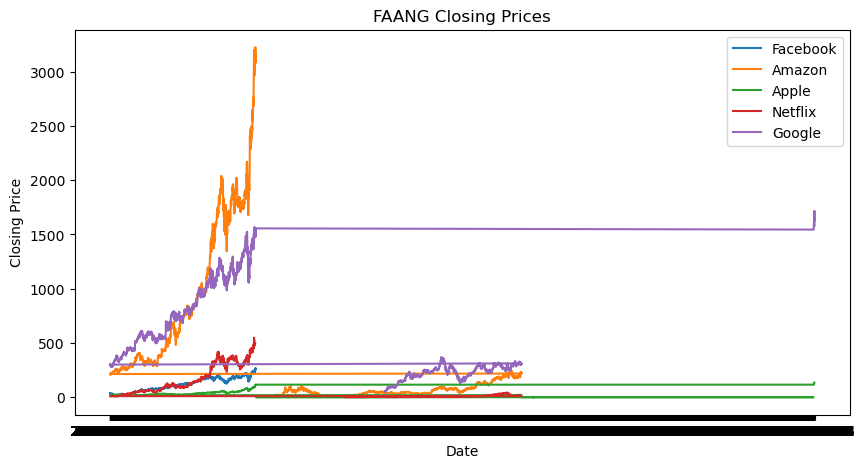

In [3]:
# Plot closing prices
plt.figure(figsize=(10, 5))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('FAANG Closing Prices')
plt.legend()
plt.show()


In [4]:
# Get summary statistics
df.groupby('Company').describe()

Open                                                             \
            count        mean         std        min         25%         50%   
Company                                                                        
Amazon     5852.0  377.469557  596.291033   1.406250   37.995000   83.699997   
Apple     10015.0    9.013322   16.842643   0.049665    0.270089    0.437500   
Facebook   2076.0  117.363415   61.512531  18.080000   67.537501  117.795002   
Google     4041.0  533.983149  383.007917  49.644646  241.211212  342.592590   
Netflix    4581.0   78.031471  118.372084   0.377857    3.778571   15.392858   

                                      High              ...   Adj Close  \
                 75%          max    count        mean  ...         75%   
Company                                                 ...               
Amazon    360.852501  3251.060059   5852.0  381.737827  ...  362.217506   
Apple      10.064286   132.759995  10015.0    9.107720  ...    8.730120   
Facebook  172.632500   268.040009   2076.0  118.699432  ...  172.502499   
Google    791.979980  1699.520020   4041.0  538.995819  ...  790.460022   
Netflix    97.830002   567.979980   4581.0   79.285690  ...   97.889999   

                        Volume                                         \
                  max    count          mean           std        min   
Company                                                                 
Amazon    3225.000000   5852.0  7.512673e+06  7.278144e+06   487200.0   
Apple      134.179993  10015.0  3.413188e+08  3.426534e+08  1388800.0   
Facebook   268.440002   2076.0  3.265524e+07  2.906292e+07  5913100.0   
Google    1717.390015   4041.0  6.909802e+06  7.895987e+06   520600.0   
Netflix    548.729980   4581.0  1.760516e+07  1.971130e+07   285600.0   

                                                               
                  25%          50%          75%           max  
Company                                                        
Amazon      3681975.0    5652850.0    8517450.0  1.043292e+08  
Apple     131594400.0  228538000.0  425009200.0  7.421641e+09  
Facebook   16219175.0   23732350.0   38899400.0  5.735764e+08  
Google      1844600.0    4191600.0    8702600.0  8.215110e+07  
Netflix     6908900.0   11553500.0   21134400.0  3.234140e+08  

[5 rows x 48 columns]

In [5]:
# Check for missing values
df.isnull().sum()


Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64

In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify data types
df.dtypes


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Company              object
dtype: object

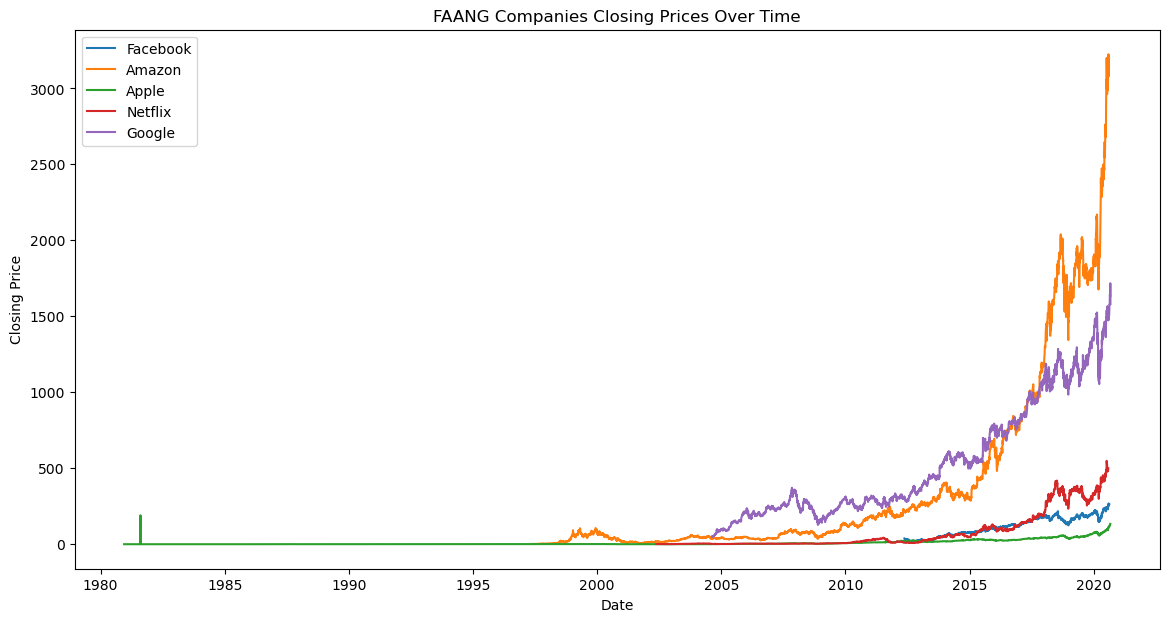

In [12]:
# Plot closing prices over time
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('FAANG Companies Closing Prices Over Time')
plt.legend()
plt.show()


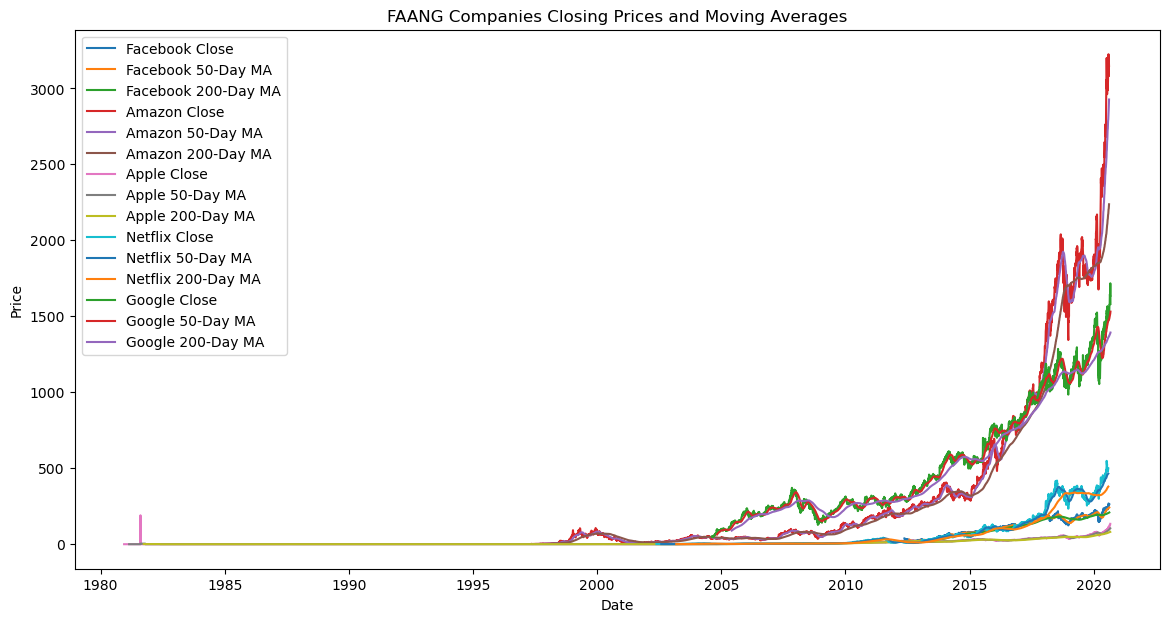

In [13]:
# Calculate moving averages
df['50_MA'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(window=50).mean())
df['200_MA'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(window=200).mean())

# Plot moving averages
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=f'{company} Close')
    plt.plot(company_data['Date'], company_data['50_MA'], label=f'{company} 50-Day MA')
    plt.plot(company_data['Date'], company_data['200_MA'], label=f'{company} 200-Day MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('FAANG Companies Closing Prices and Moving Averages')
plt.legend()
plt.show()

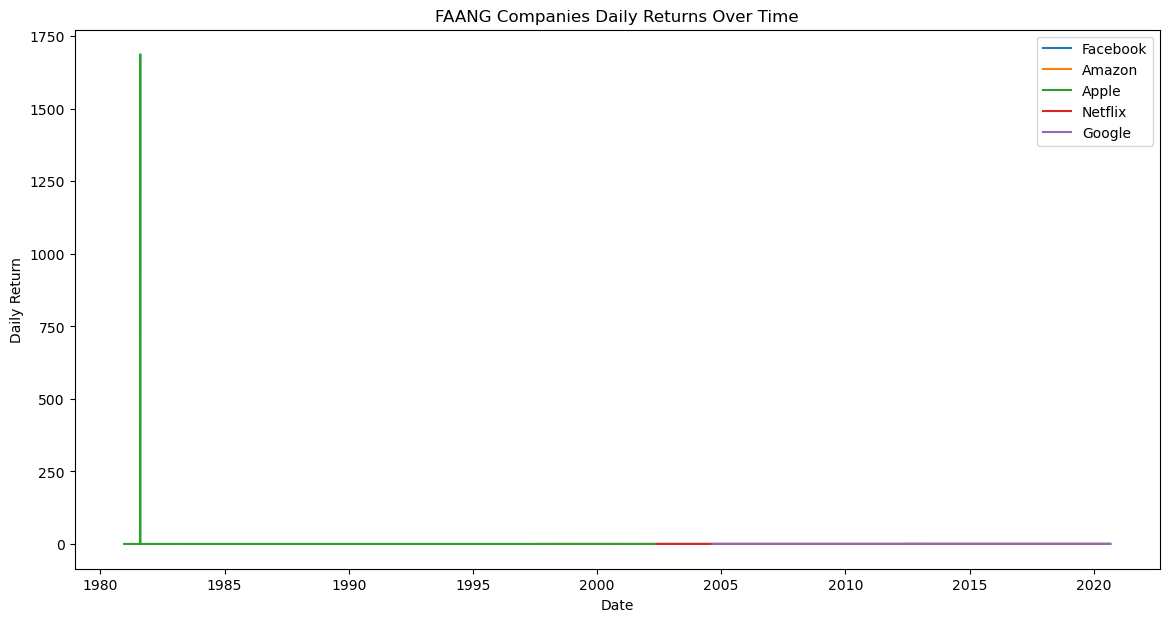

In [14]:
# Calculate daily returns
df['Daily_Return'] = df.groupby('Company')['Close'].transform(lambda x: x.pct_change())

# Plot daily returns
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily_Return'], label=company)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('FAANG Companies Daily Returns Over Time')
plt.legend()
plt.show()


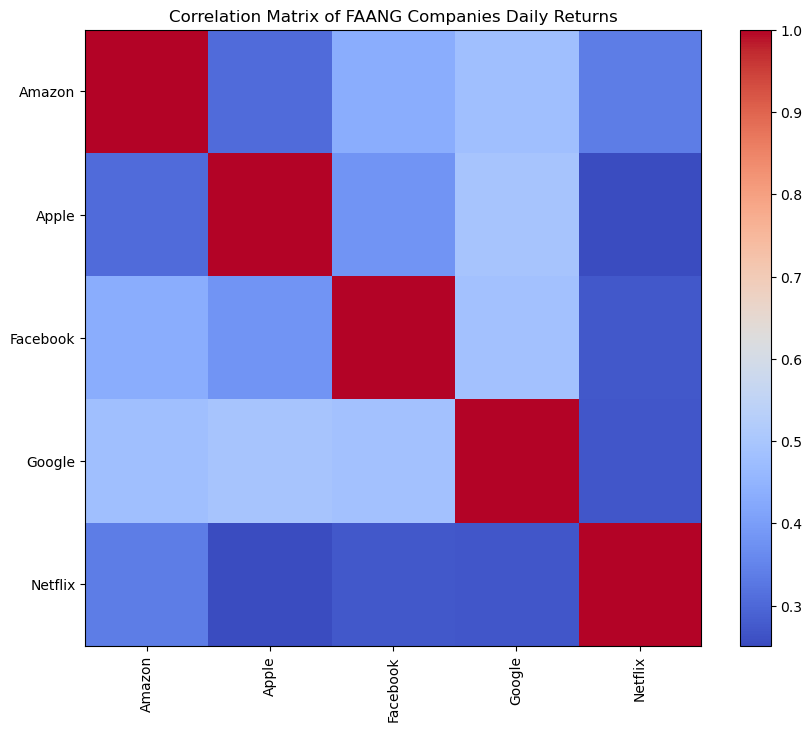

In [15]:
# Pivot the DataFrame to have dates as rows and companies as columns
returns_pivot = df.pivot(index='Date', columns='Company', values='Daily_Return')

# Calculate the correlation matrix
correlation_matrix = returns_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of FAANG Companies Daily Returns')
plt.show()

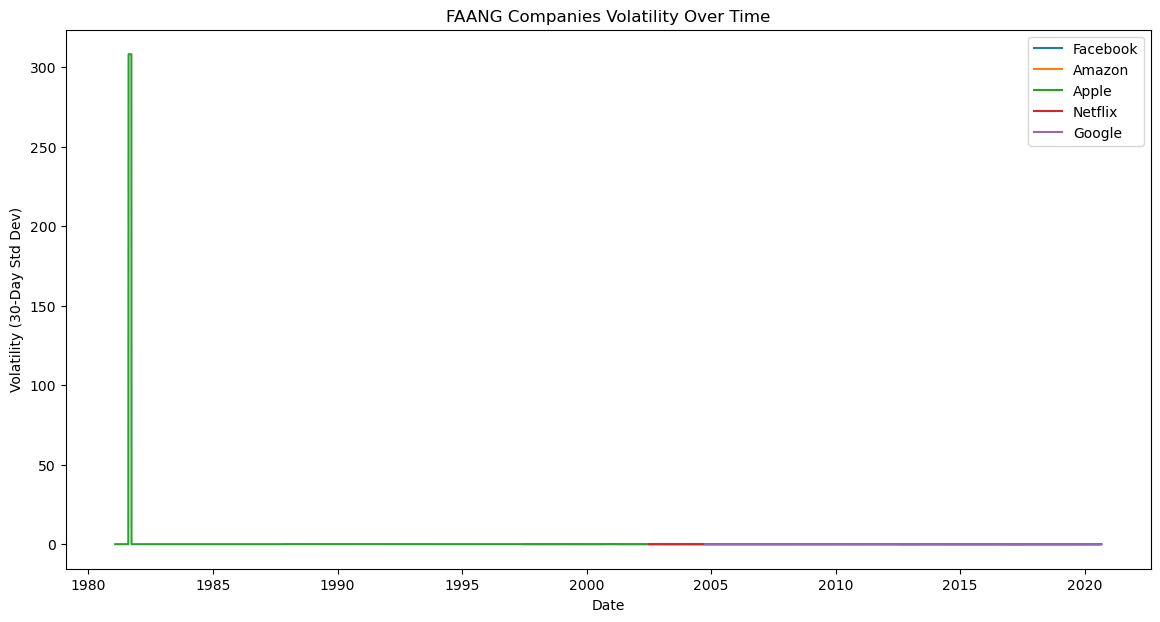

In [16]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=30).std())

# Plot volatility
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volatility'], label=company)

plt.xlabel('Date')
plt.ylabel('Volatility (30-Day Std Dev)')
plt.title('FAANG Companies Volatility Over Time')
plt.legend()
plt.show()

In [17]:
# Calculate daily returns
df['Daily_Return'] = df.groupby('Company')['Close'].transform(lambda x: x.pct_change())

# Check if the calculation is correct
df[['Company', 'Date', 'Close', 'Daily_Return']].head(10)


,Company,Date,Close,Daily_Return
0,Facebook,2012-05-18,38.230000,NaN
1,Facebook,2012-05-21,34.029999,-0.109861
2,Facebook,2012-05-22,31.000000,-0.089039
3,Facebook,2012-05-23,32.000000,0.032258
4,Facebook,2012-05-24,33.029999,0.032187
5,Facebook,2012-05-25,31.910000,-0.033909
6,Facebook,2012-05-29,28.840000,-0.096208
7,Facebook,2012-05-30,28.190001,-0.022538
8,Facebook,2012-05-31,29.600000,0.050018
9,Facebook,2012-06-01,27.719999,-0.063514


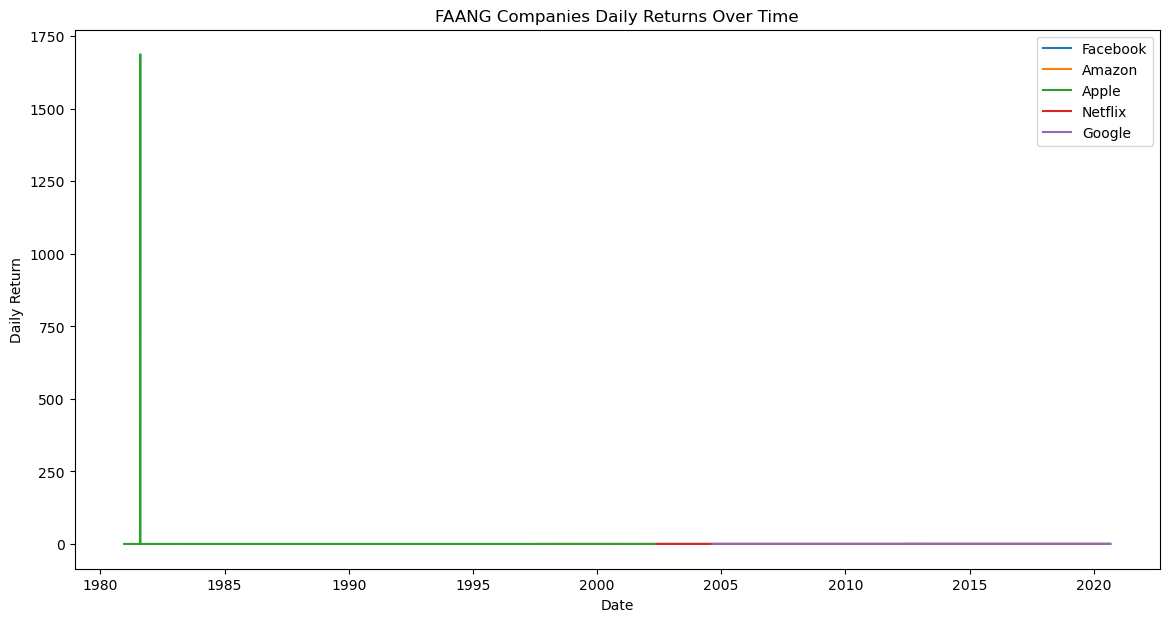

In [18]:
# Plot daily returns
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily_Return'], label=company)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('FAANG Companies Daily Returns Over Time')
plt.legend()
plt.show()


In [19]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=30).std())

# Check if the calculation is correct
df[['Company', 'Date', 'Daily_Return', 'Volatility']].head(10)


,Company,Date,Daily_Return,Volatility
0,Facebook,2012-05-18,NaN,NaN
1,Facebook,2012-05-21,-0.109861,NaN
2,Facebook,2012-05-22,-0.089039,NaN
3,Facebook,2012-05-23,0.032258,NaN
4,Facebook,2012-05-24,0.032187,NaN
5,Facebook,2012-05-25,-0.033909,NaN
6,Facebook,2012-05-29,-0.096208,NaN
7,Facebook,2012-05-30,-0.022538,NaN
8,Facebook,2012-05-31,0.050018,NaN
9,Facebook,2012-06-01,-0.063514,NaN


In [20]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=30).std())

# Check if the calculation is correct
df[['Company', 'Date', 'Daily_Return', 'Volatility']].head(10)


,Company,Date,Daily_Return,Volatility
0,Facebook,2012-05-18,NaN,NaN
1,Facebook,2012-05-21,-0.109861,NaN
2,Facebook,2012-05-22,-0.089039,NaN
3,Facebook,2012-05-23,0.032258,NaN
4,Facebook,2012-05-24,0.032187,NaN
5,Facebook,2012-05-25,-0.033909,NaN
6,Facebook,2012-05-29,-0.096208,NaN
7,Facebook,2012-05-30,-0.022538,NaN
8,Facebook,2012-05-31,0.050018,NaN
9,Facebook,2012-06-01,-0.063514,NaN


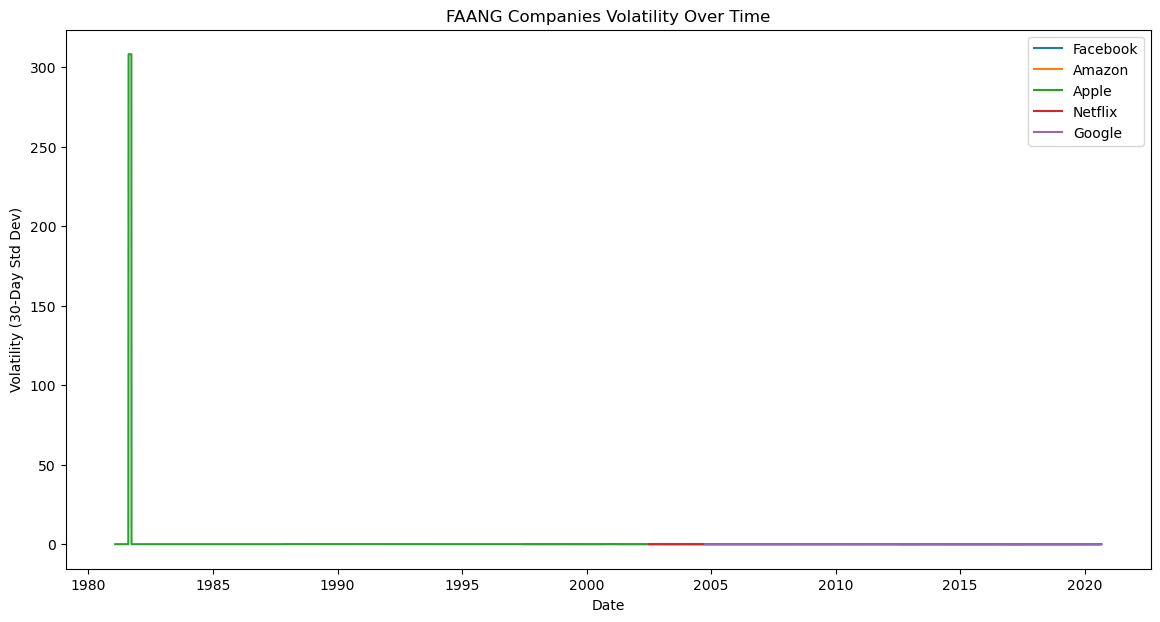

In [21]:
# Plot volatility
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volatility'], label=company)

plt.xlabel('Date')
plt.ylabel('Volatility (30-Day Std Dev)')
plt.title('FAANG Companies Volatility Over Time')
plt.legend()
plt.show()


In [22]:
# Display the first few rows of each company's data
print(fb.head())
print(amzn.head())
print(aapl.head())
print(nflx.head())
print(googl.head())


         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

      Volume   Company  
0  573576400  Facebook  
1  168192700  Facebook  
2  101786600  Facebook  
3   73600000  Facebook  
4   50237200  Facebook  
         Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.

In [23]:
# Add a column to identify the company
fb['Company'] = 'Facebook'
amzn['Company'] = 'Amazon'
aapl['Company'] = 'Apple'
nflx['Company'] = 'Netflix'
googl['Company'] = 'Google'

# Combine all data into a single DataFrame
df = pd.concat([fb, amzn, aapl, nflx, googl], ignore_index=True)

# Display the first few rows of the combined data
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,Facebook
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook


In [24]:
# Display the first few rows of each company's data to ensure they are loaded correctly
print("Facebook data:\n", fb.head())
print("Amazon data:\n", amzn.head())
print("Apple data:\n", aapl.head())
print("Netflix data:\n", nflx.head())
print("Google data:\n", googl.head())


Facebook data:
          Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

      Volume   Company  
0  573576400  Facebook  
1  168192700  Facebook  
2  101786600  Facebook  
3   73600000  Facebook  
4   50237200  Facebook  
Amazon data:
          Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200 

In [25]:
# Add a column to identify the company
fb['Company'] = 'Facebook'
amzn['Company'] = 'Amazon'
aapl['Company'] = 'Apple'
nflx['Company'] = 'Netflix'
googl['Company'] = 'Google'

# Combine all data into a single DataFrame
df = pd.concat([fb, amzn, aapl, nflx, googl], ignore_index=True)

# Display the first few rows of the combined data to ensure all companies are included
print(df.head(10))


         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   
5  2012-05-25  32.900002  32.950001  31.110001  31.910000  31.910000   
6  2012-05-29  31.480000  31.690001  28.650000  28.840000  28.840000   
7  2012-05-30  28.700001  29.549999  27.860001  28.190001  28.190001   
8  2012-05-31  28.549999  29.670000  26.830000  29.600000  29.600000   
9  2012-06-01  28.889999  29.150000  27.389999  27.719999  27.719999   

        Volume   Company  
0  573576400.0  Facebook  
1  168192700.0  Facebook  
2  101786600.0  Facebook  
3   73600000.0  Facebook  
4   50237200.0  Facebook  
5   37149800.0  Facebook  
6   78063400.0  Fa

In [26]:
# Check the unique values in the 'Company' column to ensure all companies are included
print("Unique companies in the combined DataFrame:", df['Company'].unique())


Unique companies in the combined DataFrame: ['Facebook' 'Amazon' 'Apple' 'Netflix' 'Google']


/var/folders/15/5lnk040s0_5_yg86rhrssxmr0000gn/T/ipykernel_5726/3936603815.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily_Return'] = df.groupby('Company')['Close'].transform(lambda x: x.pct_change())


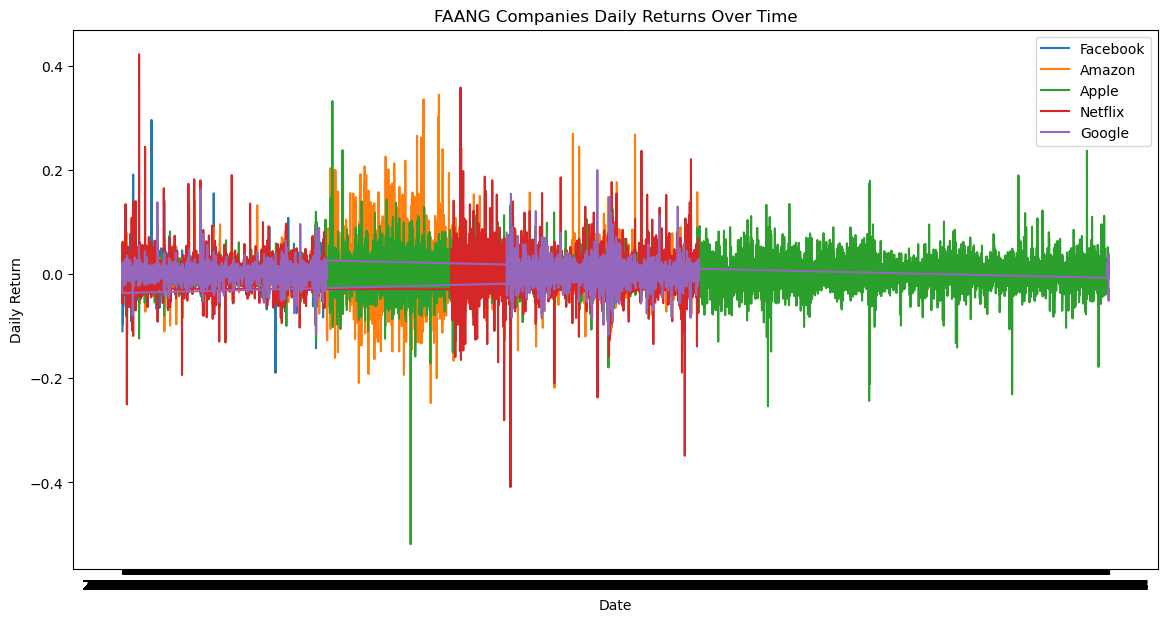

In [27]:
# Calculate daily returns
df['Daily_Return'] = df.groupby('Company')['Close'].transform(lambda x: x.pct_change())

# Plot daily returns
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily_Return'], label=company)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('FAANG Companies Daily Returns Over Time')
plt.legend()
plt.show()


In [28]:
# Calculate daily returns with fill_method=None to avoid FutureWarning
df['Daily_Return'] = df.groupby('Company')['Close'].transform(lambda x: x.pct_change(fill_method=None))

# Check if the calculation is correct
df[['Company', 'Date', 'Close', 'Daily_Return']].head(10)


,Company,Date,Close,Daily_Return
0,Facebook,2012-05-18,38.230000,NaN
1,Facebook,2012-05-21,34.029999,-0.109861
2,Facebook,2012-05-22,31.000000,-0.089039
3,Facebook,2012-05-23,32.000000,0.032258
4,Facebook,2012-05-24,33.029999,0.032187
5,Facebook,2012-05-25,31.910000,-0.033909
6,Facebook,2012-05-29,28.840000,-0.096208
7,Facebook,2012-05-30,28.190001,-0.022538
8,Facebook,2012-05-31,29.600000,0.050018
9,Facebook,2012-06-01,27.719999,-0.063514


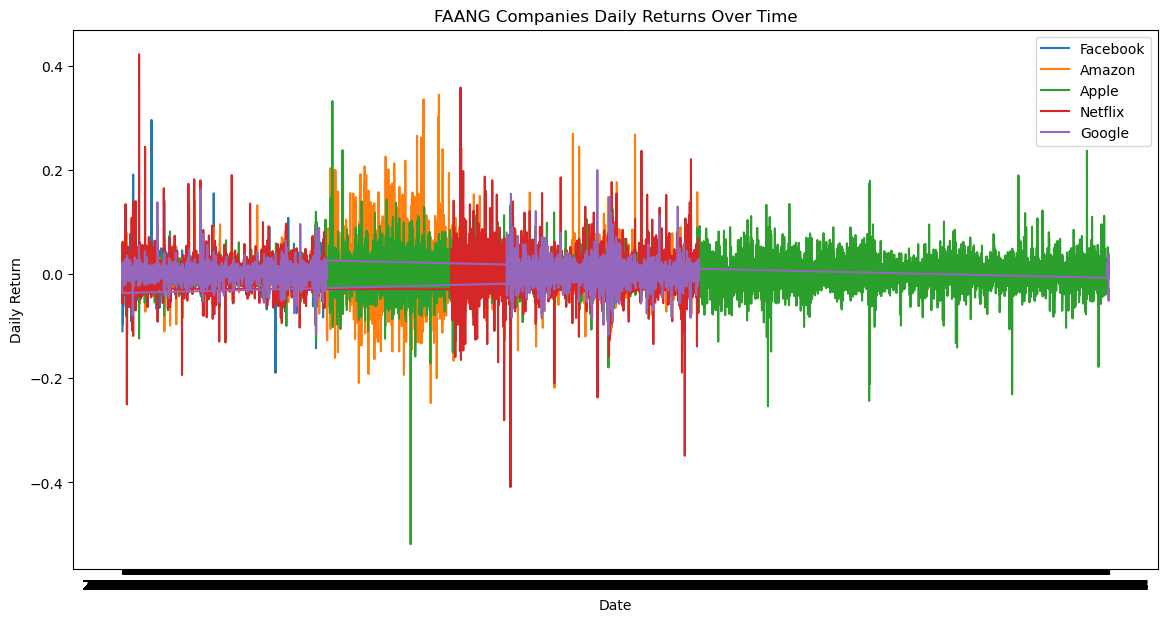

In [29]:
# Plot daily returns
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily_Return'], label=company)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('FAANG Companies Daily Returns Over Time')
plt.legend()
plt.show()


In [30]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=30).std())

# Check if the calculation is correct
df[['Company', 'Date', 'Daily_Return', 'Volatility']].head(10)


,Company,Date,Daily_Return,Volatility
0,Facebook,2012-05-18,NaN,NaN
1,Facebook,2012-05-21,-0.109861,NaN
2,Facebook,2012-05-22,-0.089039,NaN
3,Facebook,2012-05-23,0.032258,NaN
4,Facebook,2012-05-24,0.032187,NaN
5,Facebook,2012-05-25,-0.033909,NaN
6,Facebook,2012-05-29,-0.096208,NaN
7,Facebook,2012-05-30,-0.022538,NaN
8,Facebook,2012-05-31,0.050018,NaN
9,Facebook,2012-06-01,-0.063514,NaN


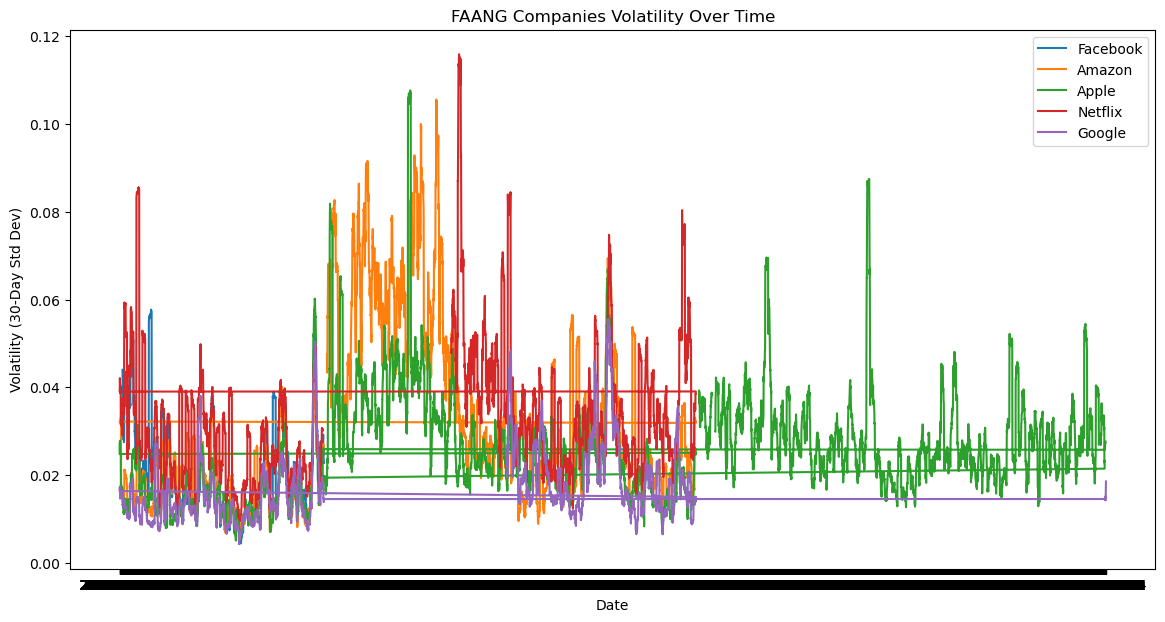

In [31]:
# Plot volatility
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volatility'], label=company)

plt.xlabel('Date')
plt.ylabel('Volatility (30-Day Std Dev)')
plt.title('FAANG Companies Volatility Over Time')
plt.legend()
plt.show()


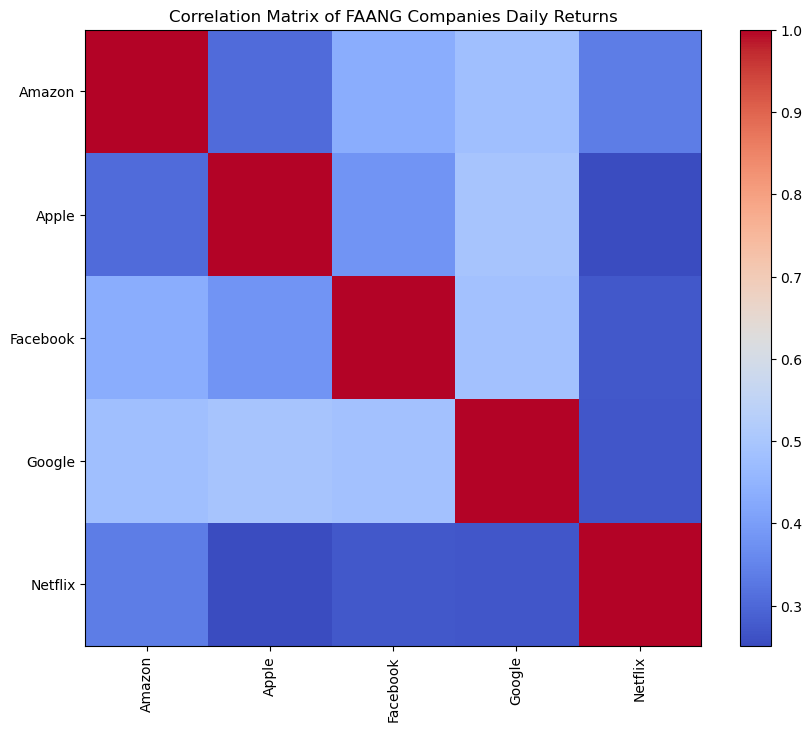

In [32]:
# Pivot the DataFrame to have dates as rows and companies as columns
returns_pivot = df.pivot(index='Date', columns='Company', values='Daily_Return')

# Calculate the correlation matrix
correlation_matrix = returns_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of FAANG Companies Daily Returns')
plt.show()
